Open Data Science Course, topic 9: Time series

## Imports  

In [4]:
# Vectors, matrices, data manipulation, tables and plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
# Statistics, econometrics
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
# Function minimization for dates
from dateutil.relativedelta import relativedelta
from scipy.optimize import minimize
# Nice progressbar and ..
from itertools import product
from tqdm import tqdm_notebook as tqdm
# Show plots inline
%matplotlib inline

Import metrics

In [26]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Read and visualize data

In [5]:
ads = pd.read_csv('data/ads.csv', index_col=["Time"], parse_dates=["Time"])
currency = pd.read_csv('data/currency.csv', index_col=["Time"], parse_dates=["Time"])


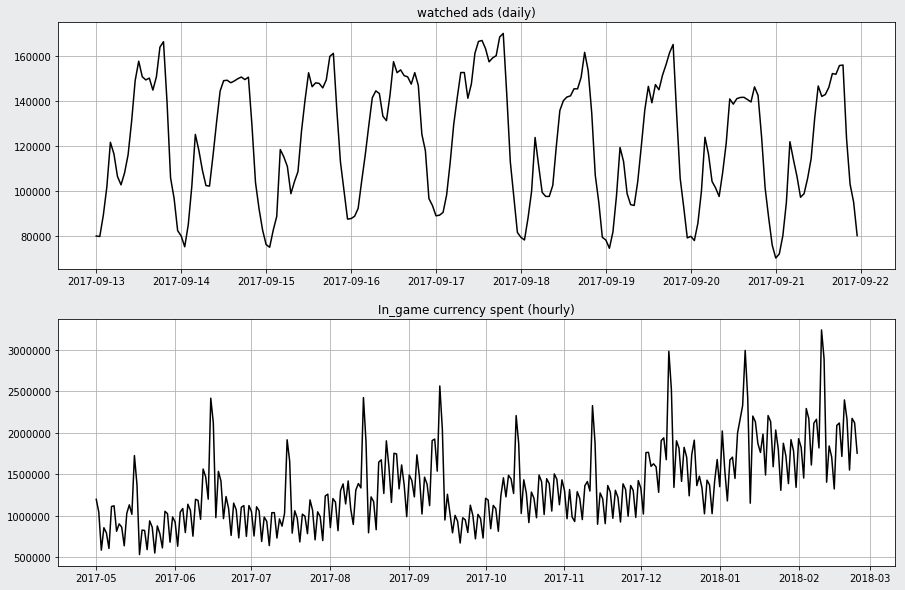

In [23]:
plt.figure(figsize=(15,10), facecolor='#eaebec')

plt.subplot(211)
plt.grid(True)
plt.title('watched ads (daily)')
plt.plot(ads.Ads, color='black')


plt.subplot(212)
plt.grid(True)
plt.plot(currency.GEMS_GEMS_SPENT, color='black')
plt.title('In_game currency spent (hourly)')

plt.show()

## Moving average

<p> Our motivation is a hypothesis: "tomorrow will be the same as today", which can be rephrased as<span style='color:red; font-family:serif; font-size:16px;'> the future value of our variable depends on the average of its $k$ previous values. </span></p>


Therefore we use the **moving average**


$$
\hat{y}_{t}=\sum_{n=1}^{k}{y_{t-n}}
$$



In [27]:
def moving_average(series, n):
    return np.average(series[-n:])

In [29]:
print(f'Prediction for the last 24 hours: {moving_average(ads, 24)}')
print(f'Prediction for the last 48 hours: {moving_average(ads, 48)}')
print(f'Prediction for the last 72 hours: {moving_average(ads, 72)}')
print(f'Prediction for the last 96 hours: {moving_average(ads, 96)}')
print(f'Prediction for the last 120 hours: {moving_average(ads, 120)}')

Prediction for the last 24 hours: 116805.0
Prediction for the last 48 hours: 116293.75
Prediction for the last 72 hours: 116908.26388888889
Prediction for the last 96 hours: 117163.02083333333
Prediction for the last 120 hours: 120824.16666666667


_Moving average_ is unable to make predictions far in the future. But it has another use case - **smoothing the original time series to identify trends**.

There is an implementation of the moving average in _Pandas_: `pandas.DataFrame.rolling(window).mean()`

Wider window ------> Smoother trend. If the data is very noisy (finances for example), moving average can help detect common patterns

In [31]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    """
    Description: Perform the plot of the moving average with pandas and matplotlib.pyplot.
        
    Arguments:
    -----------------------------------
        series : pandas.Series or pandas.DataFrame with pandas.Series.
                DataSeries to be plotted.
        window : int.
                Rolling window size. The wider is the window, the smoother is trend.
        scale  : float.
                ########
        plot_intervals : boolean, default : False. 
                Show confidence intervals.
        plot_anomalies : boolean, default : False. 
                Show anomalies in the time series.
    
    """
    # Find the moving average for the stated window with pandas implementation
    rolling_mean = series.rolling(window).mean()
    # Plot rolling mean, set the size of the figure and the title, add grid
    plt.figure(figsize=(15,5))
    plt.title(f'Moving average for the window of size {window} ')
    plt.grid()
    plt.plot(rolling_mean, c='g', label='Rolling mean trend')
    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        # Mean absolute error
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        # Set the deviation 
        deviation = np.std(series[window:] - rolling_mean[window:])
        # Set the lower and upper bonds
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        # Plot the upper and lower bonds
        plt.plot(upper_bond, 'r--', label = 'Upper Bond')
        plt.plot(lower_bond, 'r--', label = 'Lower Bond')
        
    # Find abnormal values (anomalies)
    if plot_anomalies:
        # Get the index and name of columns from the original series
        anomalies = pd.DataFrame(index=series.index, columns=series.columns)
        # Set all outbound values as abnormal
        anomalies[series < lower_bound] = series[series < lower_bound]
        anomalies[series > upper_bound] = series[series > upper_bound]
        # Plot the anomalies
        plt.plot(anomalies, 'ro', markersize=10)
    
    # Plot the actual values 
    plt.plot(series[window:], label='Actual values')
    # Place legend in the upper left corner
    plt.legend(loc='upper left')    

Smooth by the previous 2, 4, 8, 12, 24, 36 and 72 hours

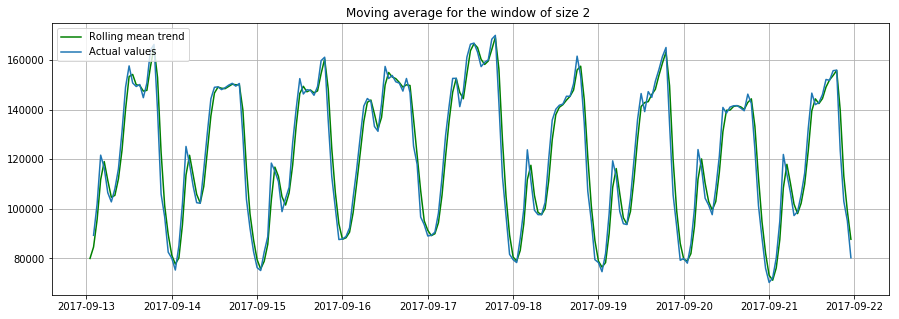

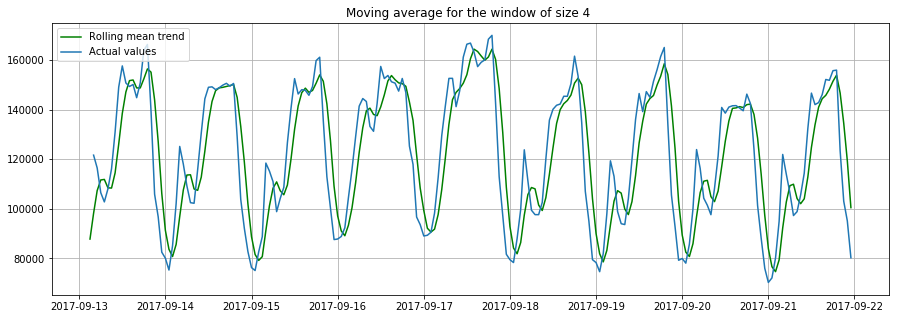

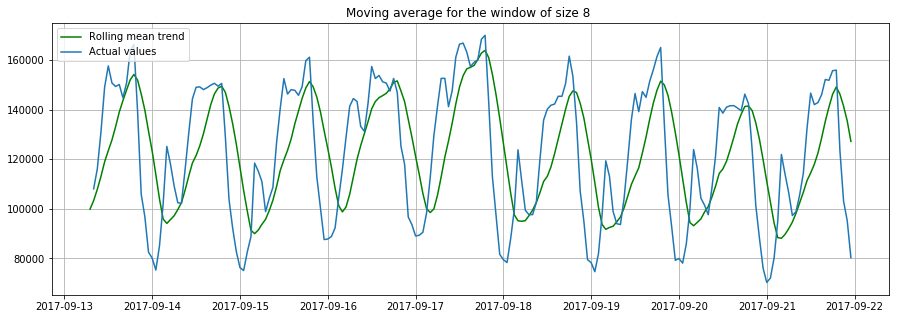

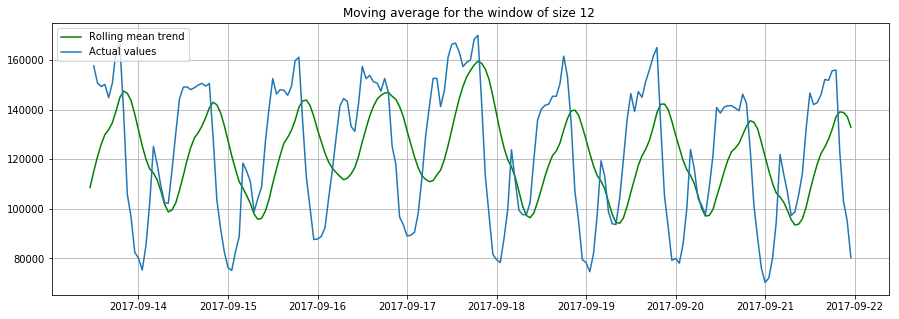

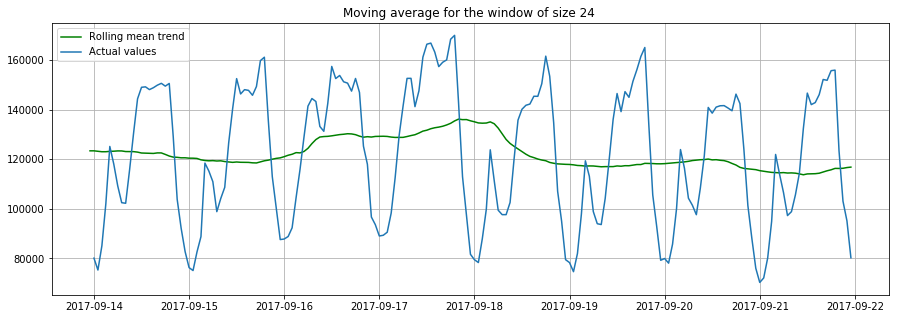

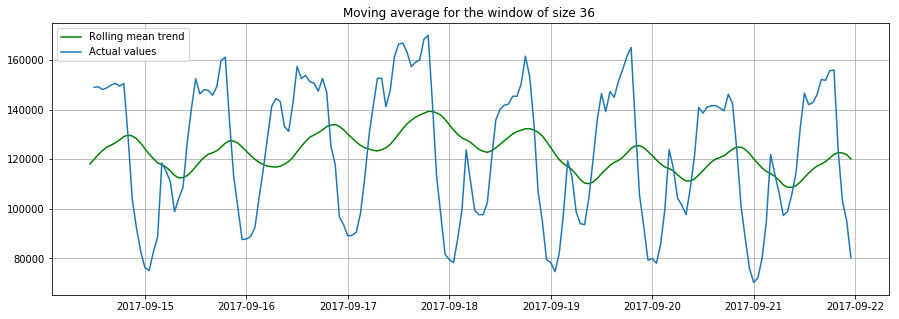

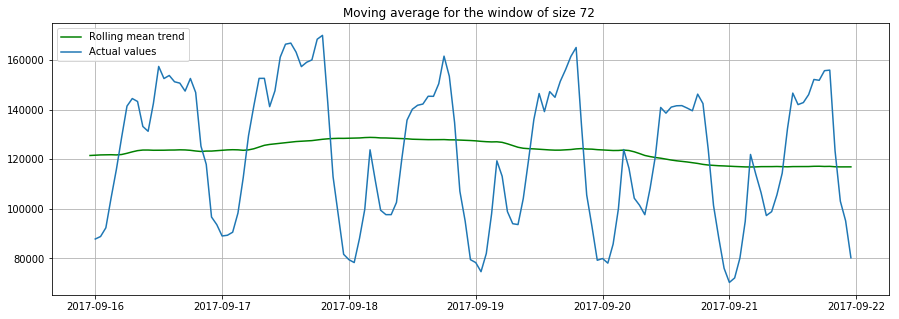

In [36]:
plot_moving_average(ads,2)
plot_moving_average(ads, 4)
plot_moving_average(ads, 8)
plot_moving_average(ads, 12)
plot_moving_average(ads, 24)
plot_moving_average(ads, 36)
plot_moving_average(ads, 72)
plt.show()